Import Libraries

Pandas → Used for handling dataset (rows, columns)
NumPy → Mathematical operations
Matplotlib → Used to show graph (Actual vs Predicted)

In [31]:
pip install xgboost

In [32]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

train_test_split → Divides data into training and testing

LabelEncoder → Converts text values into numbers

RandomForestRegressor → Machine Learning model used for prediction

Metrics → To evaluate model performance

Load demand_history.csv

Loads demand history dataset into dataframe

Convert Monthly Data into Long Format

In [ ]:
df = pd.read_csv("/content/demand_history.csv")

print(df.head())
print(df.shape)


  product     aps  year    Jan    Feb    Mar    Apr    May    Jun    Jul  \
0      AH    ACNF  2022  10733  10328  11188  13739  14420  14603  16511   
1      AH    ACNF  2023  10986  10045  12266  14883  15757  16825  18040   
2      AH    ACNF  2024  11780  11171  12055  15155  16929  17593  19231   
3      AH    ACNF  2025  12858  10793  13054  16149  18015  17905  19817   
4      AH  AH_FIT  2022   7499   6928   7445   8990   9704  10243  11236   

     Aug    Sep    Oct    Nov    Dec  
0  14448  15313  14503  11708   8903  
1  15043  15044  13479  13493  10554  
2  17170  16159  13870  11529  12644  
3  17575  17790  15962  13540  11776  
4   9334  10446   9331   7715   6057  
(92, 15)


This code loads demand_history.csv into a pandas DataFrame named df, then displays the first 5 rows and its shape (rows, columns).



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This code mounts your Google Drive to the Colab environment, allowing you to access files stored in your Drive

Understand the Dataset

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  92 non-null     object
 1   aps      92 non-null     object
 2   year     92 non-null     int64 
 3   Jan      92 non-null     int64 
 4   Feb      92 non-null     int64 
 5   Mar      92 non-null     int64 
 6   Apr      92 non-null     int64 
 7   May      92 non-null     int64 
 8   Jun      92 non-null     int64 
 9   Jul      92 non-null     int64 
 10  Aug      92 non-null     int64 
 11  Sep      92 non-null     int64 
 12  Oct      92 non-null     int64 
 13  Nov      92 non-null     int64 
 14  Dec      92 non-null     int64 
dtypes: int64(13), object(2)
memory usage: 10.9+ KB


,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,92.00000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,2023.50000,20866.739130,21109.739130,21859.913043,24434.108696,26574.826087,27182.934783,28166.913043,27215.565217,26019.086957,24193.782609,22290.608696,21217.456522
std,1.12416,17223.233278,17298.669215,17618.976392,20042.257793,22598.907210,23363.248560,24526.870562,23686.924715,21988.422505,19809.702634,17891.083448,17425.924673
min,2022.00000,3619.000000,4234.000000,3954.000000,4918.000000,5121.000000,3949.000000,4004.000000,4523.000000,5190.000000,5081.000000,4876.000000,4015.000000
25%,2022.75000,8589.250000,8811.500000,8566.500000,10066.000000,9877.000000,10073.500000,10845.750000,9634.000000,9524.500000,9275.750000,8995.750000,8554.500000
50%,2023.50000,14183.500000,14548.000000,13507.500000,15533.500000,17164.500000,17879.000000,18326.000000,17287.500000,17476.000000,15499.500000,13665.000000,13903.000000
75%,2024.25000,25366.500000,27407.500000,27695.250000,31932.250000,36614.000000,36727.750000,36622.500000,37234.500000,37146.000000,32358.250000,28416.250000,27755.250000
max,2025.00000,65981.000000,65538.000000,71751.000000,81982.000000,92392.000000,98405.000000,100921.000000,106900.000000,92378.000000,84931.000000,67806.000000,72336.000000


This code displays a summary of the DataFrame df's structure and data types using df.info(), and descriptive statistics for its numerical columns using df.describe()

Handle Missing Values


In [ ]:

for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-4152115602.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-4152115602.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

This code fills missing numerical values in the DataFrame with the mean of their respective columns and fills missing categorical values with the mode of their respective columns

Convert Categorical Columns

In [ ]:
#Moved df = pd.get_dummies(df, drop_first=True) to after melting

This code cell originally contained the pd.get_dummies operation for converting categorical columns but was commented out and moved to a later step, specifically after the data melting process, to ensure proper handling of all categorical features.

Define Features & Target

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reload the original DataFrame to ensure 'product' and 'aps' columns are present
df = pd.read_csv("/content/demand_history.csv")

# Re-apply missing value handling, as the DataFrame was reloaded
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Melt the DataFrame to convert month columns into rows
df_melted = df.melt(id_vars=['product', 'aps', 'year'], value_vars=months, var_name='month', value_name='demand')

# Convert categorical columns in the melted DataFrame into dummy variables
df_processed = pd.get_dummies(df_melted, columns=['product', 'aps', 'month'], drop_first=True)

X = df_processed.drop('demand', axis=1)   # Features
y = df_processed['demand']               # Target

This code reloads the original data, handles missing values, converts the monthly demand data from a wide to a long format (df_melted), applies one-hot encoding to categorical features (df_processed), and then separates the features (X) from the target variable (y)

Train–Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


This code splits the features (X) and target (y) into training (X_train, y_train) and testing (X_test, y_test) sets, with 20% of the data reserved for testing and a random_state of 42 for reproducibility.

Feature Scaling

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


This code initializes a StandardScaler, then fits it to the X_train data to learn scaling parameters and transforms X_train. It then uses the same learned parameters to transform X_test, ensuring consistent scaling across both datasets.

Train the Model

In [ ]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

This code initializes a RandomForestRegressor model with 100 estimators and a fixed random_state for reproducibility, then trains the model using the X_train features and y_train target variables.




Predictions



In [ ]:
y_pred = model.predict(X_test)


This code uses the trained model to generate predictions (y_pred) on the X_test dataset.

Model Evaluation

In [42]:
print("\n===== XGBOOST RESULTS =====")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


===== XGBOOST RESULTS =====
MAE: 2276.28221719457
RMSE: 3408.0042072347655
R2 Score: 0.9775430487964638


In [43]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print("R2 Score:", r2)
print("Model Accuracy (%):", round(accuracy,2))


R2 Score: 0.9775430487964638
Model Accuracy (%): 97.75


This code calculates Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R2 Score to evaluate the regression model's performance. The classification metrics are commented out because they are not suitable for a regression task

Actual vs Predicted Plot

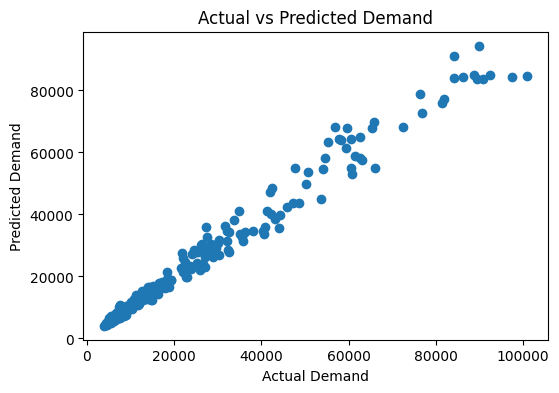

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual vs Predicted Demand")
plt.show()


This code creates a scatter plot showing the Actual Demand (y_test) against the Predicted Demand (y_pred), with appropriate labels and a title, to visualize the model's performance.

To Load External Signals

In [ ]:
external_df = pd.read_csv("/content/external_signals.csv")
external_df.head()


,year,month,avg_temp_f,heating_degree_days,cooling_degree_days,housing_starts_k,building_permits_k,gdp_growth_pct,consumer_confidence,energy_price_idx,interest_rate_pct
0,2022,1,29.3,1072.0,0.0,1299.0,1422.0,0.82,103.3,109.4,3.78
1,2022,2,29.5,1066.0,0.0,1315.0,1394.0,0.44,102.9,114.9,3.75
2,2022,3,43.4,647.0,0.0,1485.0,1614.0,1.38,102.8,94.6,3.86
3,2022,4,56.1,266.0,0.0,1569.0,1722.0,0.56,93.9,108.3,3.62
4,2022,5,65.8,0.0,23.0,1611.0,1807.0,0.72,94.0,112.2,3.93


This code loads the external_signals.csv dataset into a DataFrame named external_df and then displays its first 5 rows.

Merge

In [ ]:


# First, create a 'month_name' column in external_df to match the format in df_melted.
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
external_df['month_name'] = external_df['month'].map(month_mapping)


df_merged = pd.merge(
    df_melted,  # Use df_melted which has 'year' and string 'month' column
    external_df,
    left_on=['year', 'month'],  # Columns from df_melted
    right_on=['year', 'month_name'], # Columns from external_df
    how="left"
)


df_merged = df_merged.drop(columns=['month_name', 'month_y'])
df_merged = df_merged.rename(columns={'month_x': 'month'})


df_processed = pd.get_dummies(df_merged, columns=['product', 'aps', 'month'], drop_first=True)

X = df_processed.drop('demand', axis=1)   # Features
y = df_processed['demand']               # Target

print("Updated X head with external signals:")
print(X.head())

Updated X head with external signals:
   year  avg_temp_f  heating_degree_days  cooling_degree_days  \
0  2022        29.3               1072.0                  0.0   
1  2023        33.7                940.0                  0.0   
2  2024        28.6               1093.0                  0.0   
3  2025        30.8               1025.0                  0.0   
4  2022        29.3               1072.0                  0.0   

   housing_starts_k  building_permits_k  gdp_growth_pct  consumer_confidence  \
0            1299.0              1422.0            0.82                103.3   
1            1295.0              1390.0            0.39                100.6   
2            1266.0              1372.0            1.25                106.6   
3            1349.0              1480.0            0.70                111.9   
4            1299.0              1422.0            0.82                103.3   

   energy_price_idx  interest_rate_pct  ...  month_Dec  month_Feb  month_Jan  \
0         

This code merges the melted demand data (df_melted) with external signals (external_df) based on year and month, cleans up redundant columns, re-applies one-hot encoding to categorical features, and then re-defines the features (X) and target variable (y).

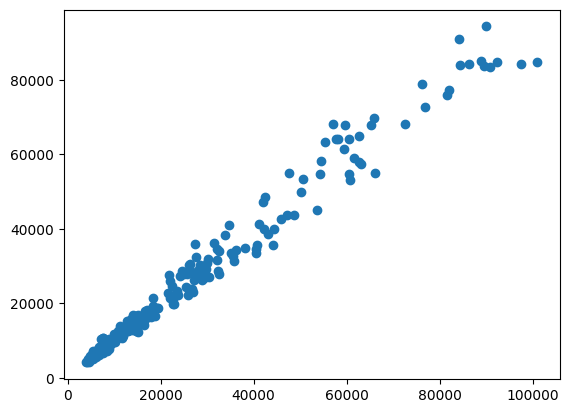

In [ ]:

# Select only numeric columns to calculate their means
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
plt.scatter(y_test, y_pred)

This code identifies numerical columns in df, fills their missing values with the column means, and then creates a scatter plot of y_test against y_pred.